In [1]:
import zipfile
import os

zip_path = "/content/archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

os.listdir("/content")


['.config',
 'archive.zip',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'sample_data']

In [3]:
import pandas as pd
df= pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape #Tamaño
df.info() #info general
df['Churn'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count
Churn,
No,5174
Yes,1869


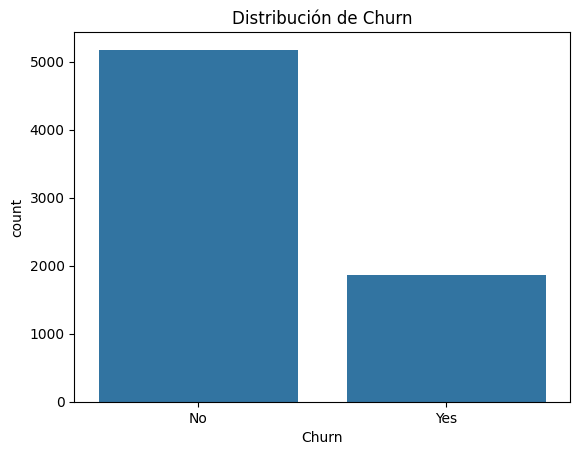

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Distribución de Churn")
plt.show()


# LIMPIEZA DE **DATOS**

In [6]:
df["TotalCharges"].head()


,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65


In [7]:
df["TotalCharges"].dtype


dtype('O')

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
#ESTA COMO OBJECT Y LA QUEREEMOS NUMERICA

In [13]:
df.isnull().sum() #QUITAMOS VALORES NULOS


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
df = df.dropna()


In [15]:
df.drop(columns=["customerID"], inplace=True)


PREPARACION DEL **MODELO**

In [16]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [17]:
X = pd.get_dummies(X, drop_first=True)
#CONVERTIMOS TEXTO A NUMEROS

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**REGRESION LOGISTICA**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [21]:
y_pred = model.predict(X_test)


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



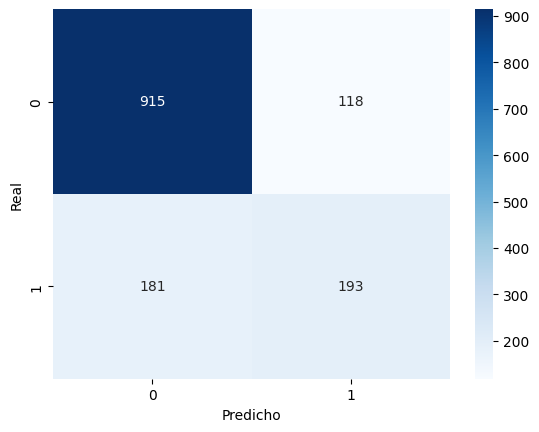

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


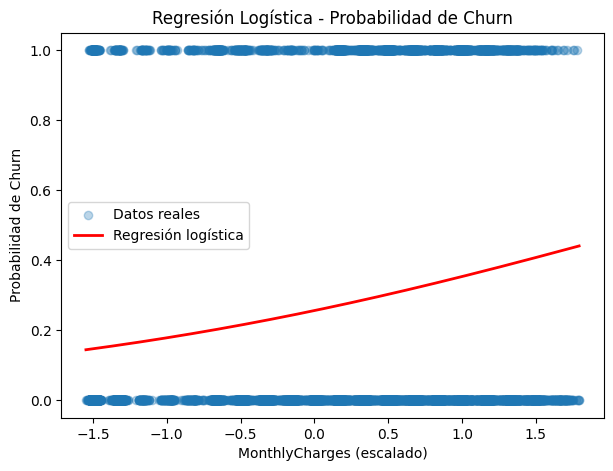

In [24]:
X_simple = df[["MonthlyCharges"]]
y_simple = df["Churn"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_simple_scaled = scaler.fit_transform(X_simple)
from sklearn.linear_model import LogisticRegression

model_simple = LogisticRegression()
model_simple.fit(X_simple_scaled, y_simple)

import numpy as np

X_range = np.linspace(
    X_simple_scaled.min(),
    X_simple_scaled.max(),
    300
).reshape(-1, 1)
y_prob = model_simple.predict_proba(X_range)[:, 1]

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

# Datos reales
plt.scatter(
    X_simple_scaled,
    y_simple.map({"No": 0, "Yes": 1}),
    alpha=0.3,
    label="Datos reales"
)

# Curva logística
plt.plot(
    X_range,
    y_prob,
    color="red",
    linewidth=2,
    label="Regresión logística"
)

plt.xlabel("MonthlyCharges (escalado)")
plt.ylabel("Probabilidad de Churn")
plt.title("Regresión Logística - Probabilidad de Churn")
plt.legend()
plt.show()
